## Import statements

In [4]:
from readgssi import readgssi
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import scipy

## Base-case measurement analysis

### Functions

In [1]:
def plot_ascan_custom(data,time):
    """ Plots data over time
    
    Input:
        data:   array
        time:   array (same size as time)
    Output:
        (plot)
    """

# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(20, 10), facecolor='w', edgecolor='w')
    line = ax.plot(time,data, 'r', lw=2, label="Ez")
    ax.set_xlim([np.amin(time), np.amax(time)])
    ax.grid(which='both', axis='both', linestyle='-.')
    # ax.set_xlim(0,50)

In [112]:
def plot_two_ascan(filename1, filename2):
    """ Plots two averaged A-Scans
    
    Input:
        filename1:  path to DZT file
        filename2:  path to DZT file
    Output:
        (plot)
    """

# IMPORT and AVERAGE
    # File 1
    header1, arrs1, gps1 = readgssi.readgssi(filename1)
    arr1 = arrs1[0][:,::]
    rg = header1['rhf_range']
    filepath1 = header1['infile']
    (path, filename1) = os.path.split(filepath1)
    name1 = os.path.splitext(filename1)[0]
    mean_response1 = arr1[:,:].mean(axis=1)
    # Time shift if needed
    shift = 0
    y_time1 = np.arange(0, rg*(1+1/mean_response1.shape[0]),rg/mean_response1.shape[0])[:-1] + shift

    # File 2
    header2, arrs2, gps1 = readgssi.readgssi(filename2)
    arr2 = arrs2[0][:,::]
    filepath2 = header2['infile']
    (path, filename2) = os.path.split(filepath2)
    name2 = os.path.splitext(filename2)[0]
    mean_response2 = arr2[:,[0,1,2,3,5]].mean(axis=1)
    y_time2 = np.arange(0, rg*(1+1/mean_response2.shape[0]),rg/mean_response2.shape[0])[:-1]

# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength normalized'), num='rx1' , figsize=(8, 4), facecolor='w', edgecolor='w')
    line = ax.plot(y_time1,mean_response1, 'r', lw=2, label=f"{name1}")
    line = ax.plot(y_time2,mean_response2, 'b', lw=2, label=f"{name2}")
    ax.set_xlim([np.amin(y_time1), np.amax(y_time1)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

In [14]:
def plot_multiple_ascan_thesis(filename1, filename2, filename3):
    """ Plots three averaged A-Scans in thesis format
    
    Input:
        filename1:  path to DZT file
        filename2:  path to DZT file
        filename3:  path to DZT file
    Output:
        (plot)
    """

# IMPORT and AVERAGE
    # File 1
    header1, arrs1, gps1 = readgssi.readgssi(filename1)
    arr1 = arrs1[0][:,::]
    rg = header1['rhf_range']
    filepath1 = header1['infile']
    (path, filename1) = os.path.split(filepath1)
    name1 = os.path.splitext(filename1)[0]
    mean_response1 = arr1[:,:].mean(axis=1)
    y_time1 = np.arange(0, rg*(1+1/mean_response1.shape[0]),rg/mean_response1.shape[0])[:-1]

    # File 2
    header2, arrs2, gps1 = readgssi.readgssi(filename2)
    arr2 = arrs2[0][:,::]
    filepath2 = header2['infile']
    (path, filename2) = os.path.split(filepath2)
    name2 = os.path.splitext(filename2)[0]
    mean_response2 = arr2[:,[0,1,2,3,5]].mean(axis=1)
    y_time2 = np.arange(0, rg*(1+1/mean_response2.shape[0]),rg/mean_response2.shape[0])[:-1]

    # File 3
    header3, arrs3, gps1 = readgssi.readgssi(filename3)
    arr3 = arrs3[0][:,::]
    filepath3 = header3['infile']
    (path, filename3) = os.path.split(filepath3)
    name3 = os.path.splitext(filename3)[0]
    mean_response3 = arr3[:,[0,1,2,3,5]].mean(axis=1)
    y_time3 = np.arange(0, rg*(1+1/mean_response2.shape[0]),rg/mean_response2.shape[0])[:-1]

# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength normalized'), num='rx1' , figsize=(8, 4), facecolor='w', edgecolor='w')
    line = ax.plot(y_time2,mean_response2, 'b', lw=2, label=f"{name2}")
    line = ax.plot(y_time1,mean_response1, 'r', lw=2, label=f"{name1}")
    line = ax.plot(y_time3,mean_response3, 'g', lw=2, label=f"{name3}")
    ax.set_xlim([np.amin(y_time1), np.amax(y_time1)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

In [5]:
def plot_all_ascan(filename1):
    """ Plots all signal traces within a file
    
    Input:
        filename1:  path to DZT file
    Output:
        (plot)
    """

# IMPORT
    header1, arrs1, gps1 = readgssi.readgssi(filename1)
    arr1 = arrs1[0][:,::]
    rg = header1['rhf_range']
    filepath1 = header1['infile']
    (path, filename1) = os.path.split(filepath1)
    name1 = os.path.splitext(filename1)[0]
    y_time = np.arange(0, rg*(1+1/arr1.shape[0]),rg/arr1.shape[0])[:-1]

# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength normalized'), num='rx1' , figsize=(20, 10), facecolor='w', edgecolor='w')

    for i in range(arr1.shape[1]):
        line = ax.plot(y_time,arr1[:,i], lw=2, label=f"{name1}_{i}")

    ax.set_xlim([np.amin(y_time), np.amax(y_time)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

In [20]:
def plot_correlation(filename1, filename2):
    """ Plots a correlation of two signal traces. 
    
    Input:
        filename1:  path to DZT file
        filename2:  path to DZT file
    Output:
        (plot)
    """

# IMPORT
    # File 1
    header1, arrs1, gps1 = readgssi.readgssi(filename1)
    arr1 = arrs1[0][:,::]
    mean_response1 = arr1[:,:].mean(axis=1)
    # File 2
    header2, arrs2, gps1 = readgssi.readgssi(filename2)
    fs = np.int32(header2['rhf_spm'])
    arr2 = arrs2[0][:,::]
    mean_response2 = arr2[:,round(0.85*fs):round(0.9*fs)].mean(axis=1)

# CORRELATION
    corr = scipy.signal.correlate(mean_response1,mean_response2)
    lags = scipy.signal.correlation_lags(len(arr1), len(arr2))
    corr = corr/np.max(corr)
    xmax = lags[np.argmax(corr)]
    print(f'Offset by {xmax} datapoints')

# PLOT
    fig, ax = plt.subplots(figsize=(6,3),subplot_kw=dict(xlabel='Datapoints',ylabel='normalised correlation'))
    ax.plot(lags,corr)
    ax.axvline(xmax,color='r')
    fig.text(0.95,0.95,f'Offset by {xmax} datapoints',horizontalalignment='right',
        verticalalignment='top',transform=ax.transAxes)
    ax.set_xlim(-400,400)
    plt.show()

In [28]:
def plot_two_ascan_shifted(filename1, filename2, shift):
    """ Plots two ascans with the first one shifted by the correlation maximum. 
    
    Input:
        filename1:  path to DZT file that needs to be shifted
        filename2:  path to DZT file
        shift:      correlation maximum
    Output:
        (plot)
    """
# IMPORT AND SHIFT
    # File 1:
    header1, arrs1, gps1 = readgssi.readgssi(filename1)
    arr1 = arrs1[0][:,::]
    rg = header1['rhf_range']
    filepath1 = header1['infile']
    (path, filename1) = os.path.split(filepath1)
    name1 = os.path.splitext(filename1)[0]
    mean_response1 = arr1[:,:].mean(axis=1)
    # Shifting
    mean_response1_shifted = mean_response1[shift:]
    y_time1 = np.arange(0, rg*(1+1/mean_response1.shape[0]),rg/mean_response1.shape[0])[:-1]
    y_time1_shifted = y_time1[:-shift]

    # File 2
    header2, arrs2, gps1 = readgssi.readgssi(filename2)
    arr2 = arrs2[0][:,::]
    filepath2 = header2['infile']
    (path, filename2) = os.path.split(filepath2)
    name2 = os.path.splitext(filename2)[0]
    mean_response2 = arr2[:,[0,1,2,3,5]].mean(axis=1)
    y_time2 = np.arange(0, rg*(1+1/mean_response2.shape[0]),rg/mean_response2.shape[0])[:-1]

    # Subtracted response
    mean_response = mean_response2[:-shift] - mean_response1_shifted
    mean_response_unedit = mean_response2 - mean_response1
    mean_difference = np.array([mean_response,mean_response_unedit[shift:]]).mean(axis=0)

# PLOT
    font = {'family': 'normal',
            'weight': 'normal',
            'size': 12}
    plt.rc('font',**font)
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength'), num='rx1' , figsize=(8, 4), facecolor='w', edgecolor='w')
    line = ax.plot(y_time1_shifted,mean_response1_shifted, 'r', lw=2, label=f"{name1}")
    line = ax.plot(y_time2,mean_response2, 'b', lw=2, label=f"{name2}")
    line = ax.plot(y_time2[:-2],mean_response, 'orange',lw=2, label=f"Difference")
    # line = ax.plot(y_time2,mean_response_unedit, lw=2, label=f"Difference unshifted")
    # line = ax.plot(y_time2[:-2],mean_difference, lw=2, label=f"Difference mean")
    ax.set_xlim([np.amin(y_time2), np.amax(y_time2)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()


### Analysis and plotting

2023-01-19 13:27:23 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-19 13:27:23 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-19 13:27:23 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-19 13:27:23 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2023-01-19 13:27:23 - more info: rh_ant=['41000SA', None, None, None]
2023-01-19 13:27:23 -            known_ant=[False, None, None, None]
2023-01-19 13:27:23 - please submit a bug report with this warning, the antenna name and frequency
2023-01-19 13:27:23 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-19 13:27:23 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-19 13:27:23 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------
2023-01-19 13:27:23 - WARNING: no time zero specified

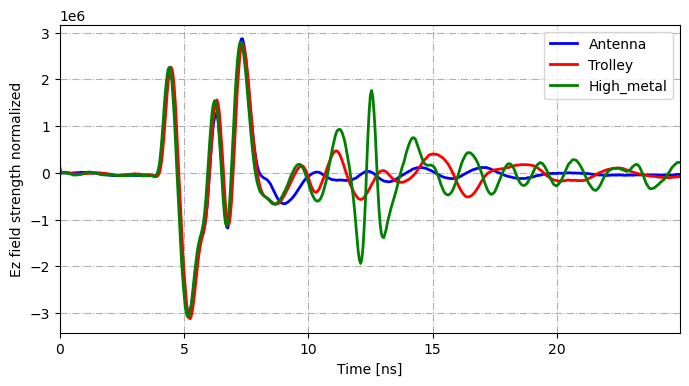

In [15]:
# filepath1 = 'data/basecase/Antenna.DZT'
# filepath1 = 'data/basecase/Trolley.DZT'
# filepath2 = 'data/basecase/Trolley.DZT'
# filepath2 = 'data/basecase/High_asphalt.DZT'
# filepath2 = 'data/basecase/High_metal.DZT'
# filepath2 = 'data/SBB_track/Hole_PSS.DZT'


# filepath1 = 'data/SBB_track/Hole_PSS.DZT'
# filepath2 = 'data/SBB_track/Hole_metalplate.DZT'

# filepath1 = 'data/SBB_track/Hole_PSS.DZT'
# filepath2 = 'data/SBB_track/Untouched_between.DZT'

# filepath1 = 'data/basecase/Antenna.DZT'
# filepath2 = 'data/SBB_track/Untouched_between.DZT'

# filepath1 = 'data/basecase/Trolley.DZT'
# filepath2 = 'data/basecase/Trolley_rails.DZT'

# plot_ascan_custom(mean_reponse_antenna,y_time)
# plot_two_ascan(filepath1,filepath2)

filepath1 = 'data/basecase/Trolley.DZT'
filepath2 = 'data/basecase/Antenna.DZT'
filepath3 = 'data/basecase/High_metal.DZT'
plot_multiple_ascan_thesis(filepath1,filepath2,filepath3)


2022-12-20 14:26:14 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2022-12-20 14:26:14 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2022-12-20 14:26:14 - WARNING: could not read frequency for antenna name "'41000SA'"
2022-12-20 14:26:14 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2022-12-20 14:26:14 - more info: rh_ant=['41000SA', None, None, None]
2022-12-20 14:26:14 -            known_ant=[False, None, None, None]
2022-12-20 14:26:14 - please submit a bug report with this warning, the antenna name and frequency
2022-12-20 14:26:14 - at https://github.com/iannesbitt/readgssi/issues/new
2022-12-20 14:26:14 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2022-12-20 14:26:14 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------


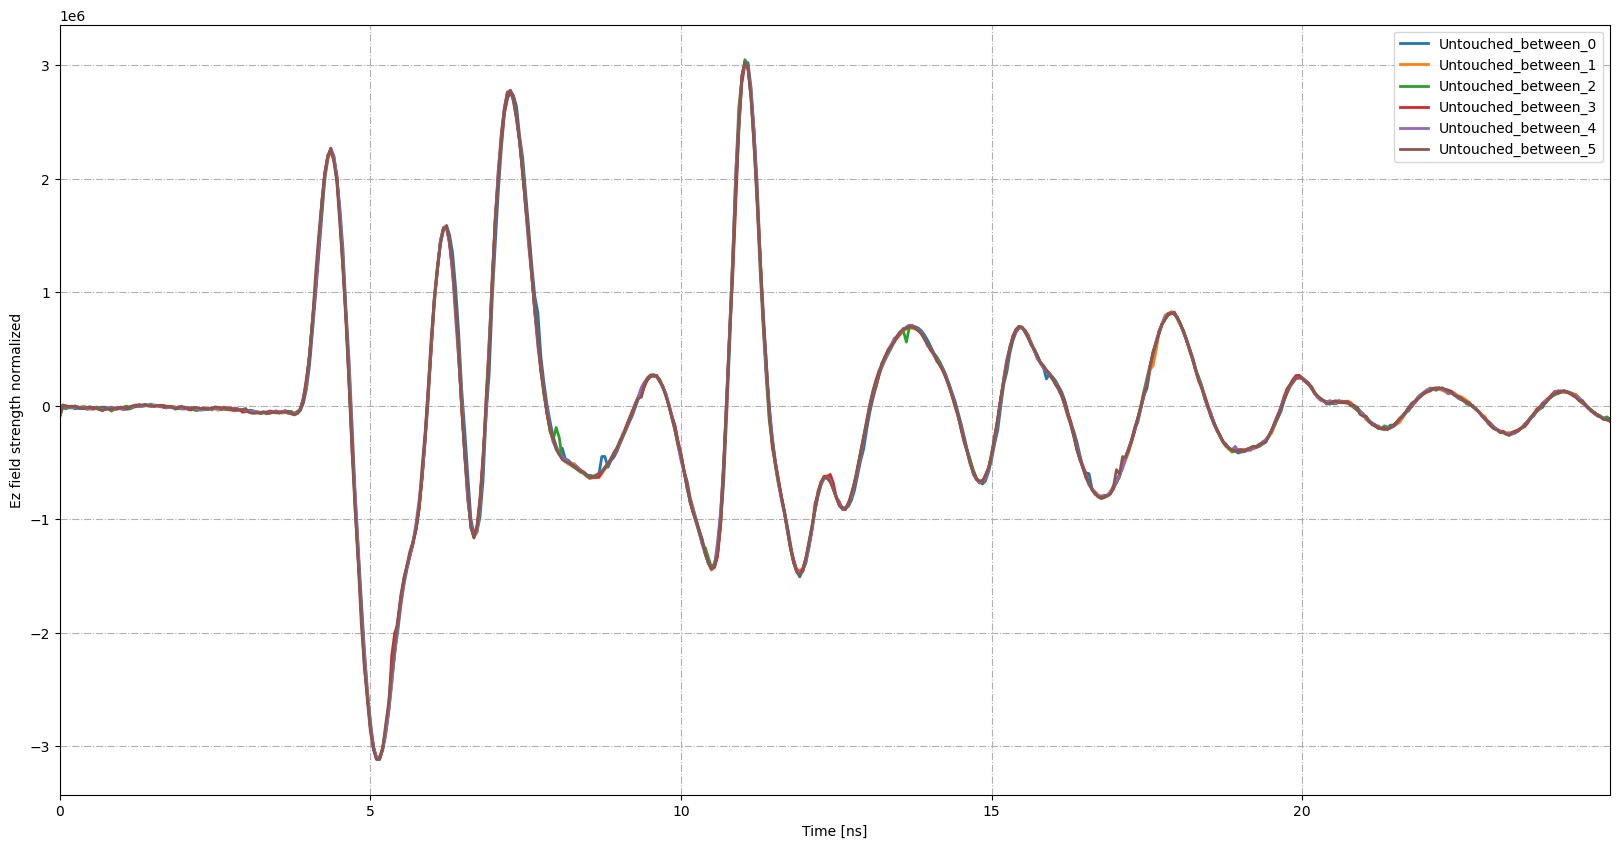

In [29]:
# filepath = 'data/basecase/Antenna.DZT'

# filepath = 'data/basecase/Trolley.DZT'

# filepath = 'data/basecase/High_asphalt.DZT'

# filepath = 'data/basecase/High_metal.DZT'

# filepath = 'data/SBB_track/Hole_PSS.DZT'

# filepath = 'data/SBB_track/Hole_metalplate.DZT'

filepath = 'data/SBB_track/Untouched_between.DZT'

plot_all_ascan(filepath)

2023-01-19 15:05:10 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-19 15:05:10 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-19 15:05:10 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-19 15:05:10 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2023-01-19 15:05:10 - more info: rh_ant=['41000SA', None, None, None]
2023-01-19 15:05:10 -            known_ant=[False, None, None, None]
2023-01-19 15:05:10 - please submit a bug report with this warning, the antenna name and frequency
2023-01-19 15:05:10 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-19 15:05:10 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-19 15:05:10 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------
2023-01-19 15:05:10 - WARNING: no time zero specified

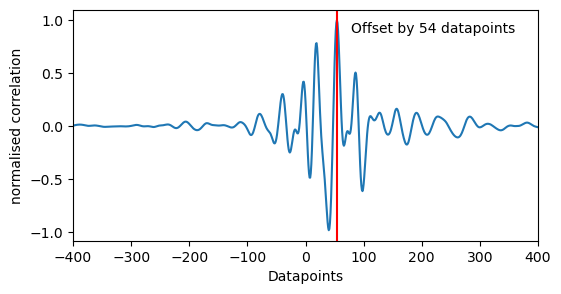

In [21]:
# filename1 = 'data/basecase/Antenna.DZT'
# filename2 = 'data/basecase/Trolley.DZT'

# filename1 = 'data/basecase/Trolley.DZT'
# filename2 = 'data/basecase/High_metal.DZT'

# filename1 = 'data/basecase/Trolley.DZT'
# filename2 = 'data/SBB_track/Hole_PSS.DZT'

# filename1 = 'data/SBB_track/Hole_PSS.DZT'
# filename2 = 'data/SBB_track/Hole_metalplate.DZT'

# filename1 = 'data/basecase/Antenna.DZT'
# filename2 = 'data/SBB_track/Untouched_between.DZT'

filename1 = 'data/basecase/Trolley.DZT'
filename2 = r"C:\Users\lukas\polybox\Shared\Master thesis Lukas\data\TestTrolley_06_10_2022\PROJECT001__008.DZT"

plot_correlation(filename1, filename2)


2023-01-27 15:17:24 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-27 15:17:24 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-27 15:17:24 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-27 15:17:24 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2023-01-27 15:17:24 - more info: rh_ant=['41000SA', None, None, None]
2023-01-27 15:17:24 -            known_ant=[False, None, None, None]
2023-01-27 15:17:24 - please submit a bug report with this warning, the antenna name and frequency
2023-01-27 15:17:24 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-27 15:17:24 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-27 15:17:24 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------
2023-01-27 15:17:24 - WARNING: no time zero specified

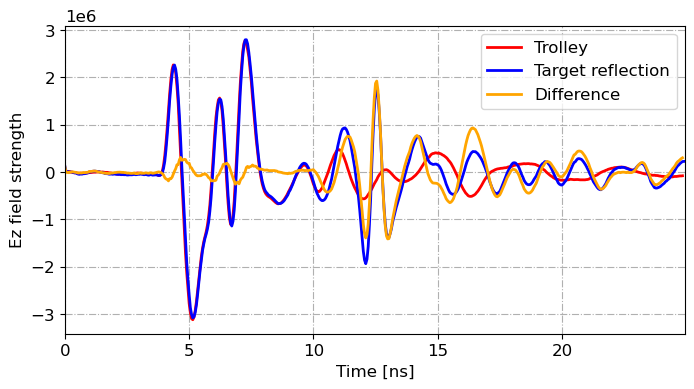

In [29]:
# filename1 = 'data/basecase/Antenna.DZT' # Shift by -1 datapoints: mean_response1_shifted = mean_response1[:-1]
# filename2 = 'data/basecase/Trolley.DZT'

# filename1 = 'data/basecase/Trolley.DZT' # Shift by +2 datapoints: mean_response1_shifted = mean_response1[2:]
# filename2 = 'data/basecase/High_asphalt.DZT'

filename1 = 'data/basecase/Trolley.DZT' # Shift by +2 datapoints: mean_response1_shifted = mean_response1[2:]
filename2 = 'data/basecase/High_metal.DZT'

# filename1 = 'data/basecase/Trolley.DZT' # Shift by +2 datapoints: mean_response1_shifted = mean_response1[2:]
# filename2 = 'data/SBB_track/Hole_PSS.DZT'

# filename1 = 'data/SBB_track/Hole_Metalplate.DZT' # Shift by 0 datapoints: mean_response1_shifted = mean_response1[2:]
# filename2 = 'data/SBB_track/Hole_PSS.DZT'

# filename1 = 'data/SBB_track/Hole_PSS.DZT' # Shift by 0 datapoints: mean_response1_shifted = mean_response1[2:]
# filename2 = 'data/SBB_track/Untouched_between.DZT'

# filename1 = 'data/basecase/Antenna.DZT' # Shift by 0 datapoints: mean_response1_shifted = mean_response1[2:]
# filename2 = 'data/SBB_track/Untouched_between.DZT'

plot_two_ascan_shifted(filename1, filename2)

## Wavefrom analysis

### Functions

In [7]:
def read_gssi(filename,average):
    """ Reads out all A-Scans from DZT file and averages all of the indices provided in average
    
    Input:
        filename:   path to DZT file
        average:    indices of A-Scans to be averaged
    Output:
        name:       filename without path
        mean_arr:   averaged fieldstrength values
        rg:         range of antenna in s
    """
    header, arrs, gps = readgssi.readgssi(filename)
    arr = arrs[0][:,::]
    mean_arr = arr[:,average].mean(axis=1)
    rg = header['rhf_range']
    filepath = header['infile']
    (path, filename) = os.path.split(filepath)
    name = os.path.splitext(filename)[0]

    return name, mean_arr, rg

In [20]:
def plot_ascan_thesis(data,time):
    """Plots A-scan that are used in the thesis,
    
    Input:
        data: Field strength
        time: arrival time of field strength
    Output:
        A-Scan plot
    """
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(10, 5), facecolor='w', edgecolor='w')
    line = ax.plot(time,data, 'r', lw=2, label="Ez")
    ax.set_xlim([np.amin(time), np.amax(time)])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.set_xlim(0,25)
    ax.set_ylim(-3.4e6,3e6)

In [40]:
def fft_power(waveform, dt):
    """Calculate a FFT of the given waveform of amplitude values;
        converted to decibels and shifted so that maximum power is 0dB

    Input:
        waveform:   time domain waveform
        dt:         time step

    Output:
        freqs:      frequency bins
        power:      power
    """

    # Calculate magnitude of frequency spectra of waveform (ignore warning from taking a log of any zero values)
    with np.errstate(divide='ignore'):
        power = 10 * np.log10(np.abs(np.fft.fft(waveform))**2)

    # Replace any NaNs or Infs from zero division
    power[np.invert(np.isfinite(power))] = 0

    # Frequency bins
    freqs = np.fft.fftfreq(power.size, d=dt)

    # Shift powers so that frequency with maximum power is at zero decibels
    power -= np.amax(power)

    return freqs, power

In [27]:
def fft_waveform(waveform,dt):
    """ Calculates a FFT of wave from and plots it

    Input:
        waveform:       time domain waveform
        dt:             time step    
    Output:
        Frequency plot  
    """
    
# CALCULATION
    # Calculate FFT
    freqs, power = fft_power(waveform, dt)

    fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='w', edgecolor='w')
    # Set plotting range to 4 times frequency at max power of waveform or
    # 4 times the centre frequency
    freqmaxpower = np.where(np.isclose(power, 0))[0][0]
    if freqs[freqmaxpower] > 1e9:
        pltrange = np.where(freqs > 4 * freqs[freqmaxpower])[0][0]
    else:
        pltrange = np.where(freqs > 4 * 1e9)[0][0]
    pltrange = np.s_[0:pltrange]

# PLOT
    markerline, stemlines, baseline = ax2.stem(freqs[pltrange], power[pltrange], linefmt='-.', use_line_collection=True)
    plt.setp(baseline, 'linewidth', 0)
    plt.setp(stemlines, 'color', 'r')
    plt.setp(markerline, 'markerfacecolor', 'r', 'markeredgecolor', 'r')
    ax2.plot(freqs[pltrange], power[pltrange], 'r', lw=2)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power [dB]')

In [68]:
def diff_two_ascan_shifted(filename1, filename2, shift):
    """Returns difference (noise reduction) of two averaged, shifted Ascans
    
    Input:
        filename1:  path to DZT file that needs to be shifted
        filename2:  path to DZT file
    Output:
        mean_response:  difference between averaged A-scans
        y_time1:        time for y-axis plot
        rg:             antenna range
    """

# IMPORT and SHIFT
    # File 1:
    header1, arrs1, gps1 = readgssi.readgssi(filename1)
    arr1 = arrs1[0][:,::]
    rg = header1['rhf_range']
    filepath1 = header1['infile']
    (path, filename1) = os.path.split(filepath1)
    name1 = os.path.splitext(filename1)[0]
    mean_response1 = arr1[:,:].mean(axis=1) # Adjust if not all A-scans should be used
    # Shifting
    mean_response1_shifted = mean_response1[shift:]
    y_time1 = np.arange(0, rg*(1+1/mean_response1.shape[0]),rg/mean_response1.shape[0])[:-1]
    y_time1_shifted = y_time1[:-shift]

    # File 2
    header2, arrs2, gps1 = readgssi.readgssi(filename2)
    arr2 = arrs2[0][:,::]
    filepath2 = header2['infile']
    (path, filename2) = os.path.split(filepath2)
    name2 = os.path.splitext(filename2)[0]
    mean_response2 = arr2[:,[0,1,2,3,5]].mean(axis=1) # Adjust if not all A-scans should be used
    y_time2 = np.arange(0, rg*(1+1/mean_response2.shape[0]),rg/mean_response2.shape[0])[:-1]

    # Difference:
    mean_response = mean_response2[:-shift] - mean_response1_shifted
   
    return mean_response, y_time1, rg

In [65]:
def plot_two_ascan_thesis(data1,time1,data2,time2):
    """Plots two A-scans that are used in the thesis,
    
    Input:
        data_i: Field strength
        time_i: arrival time of field strength
    Output:
        (A-Scan plots)
    """
# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(7, 3.5), facecolor='w', edgecolor='w')
    line = ax.plot(time1,data1, 'r', lw=2, label="Reflection from gprMax")
    line = ax.plot(time2,data2, 'g', lw=2, label="Corrected real-world reflection")
    ax.set_xlim([np.amin(time1), np.amax(time1)])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.set_xlim(0,5)
    ax.set_ylim(-1.2,1.2)
    ax.legend()

In [72]:
def fft_two_waveform(waveform1,dt1,waveform2,dt2):
    """ Calculates a FFT of two waves from and plots them

    Input:
        waveform:       time domain waveform
        dt:             time step    
    Output:
        Frequency plot  
    """
    
    # Get FFT 1
    freqs1, power1 = fft_power(waveform1, dt1)

    fig, ax2 = plt.subplots(figsize=(7, 3.5), facecolor='w', edgecolor='w')
    # Set plotting range to 4 times frequency at max power of waveform or
    # 4 times the centre frequency
    freqmaxpower1 = np.where(np.isclose(power1, 0))[0][0]
    if freqs1[freqmaxpower1] > 1e9:
        pltrange1 = np.where(freqs1 > 4 * freqs1[freqmaxpower1])[0][0]
    else:
        pltrange1 = np.where(freqs1 > 4 * 1e9)[0][0]
    pltrange1 = np.s_[0:pltrange1]
    markerline1, stemlines1, baseline1 = ax2.stem(freqs1[pltrange1], power1[pltrange1], linefmt='-.', use_line_collection=True)
    plt.setp(baseline1, 'linewidth', 0)
    plt.setp(stemlines1, 'color', 'r')
    plt.setp(markerline1, 'markerfacecolor', 'r', 'markeredgecolor', 'r')
    ax2.plot(freqs1[pltrange1], power1[pltrange1], 'r', lw=2, label="Reflection from gprMax")

    # Get FFT 2:
    freqs2, power2 = fft_power(waveform2, dt2)
    
    freqmaxpower2 = np.where(np.isclose(power2, 0))[0][0]
    if freqs1[freqmaxpower2] > 1e9:
        pltrange2 = np.where(freqs2 > 4 * freqs2[freqmaxpower2])[0][0]
    else:
        pltrange2 = np.where(freqs2 > 4 * 1e9)[0][0]
    pltrange2 = np.s_[0:pltrange2]
    markerline2, stemlines2, baseline2 = ax2.stem(freqs2[pltrange2], power2[pltrange2], linefmt='-.', use_line_collection=True)
    plt.setp(baseline2, 'linewidth', 0)
    plt.setp(stemlines2, 'color', 'g')
    plt.setp(markerline2, 'markerfacecolor', 'g', 'markeredgecolor', 'g')
    ax2.plot(freqs2[pltrange2], power2[pltrange2], 'g', lw=2, label="Corrected real-world reflection")
    
    ax2.grid(which='both', axis='both', linestyle='-.')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power [dB]')
    ax2.legend()

In [49]:
import h5py
def read_data(filename):
    """ Get data from .out file
    
    Input:
        filename:   path to .out file
    Output:
        outputdata: matrix with A-scan field strength data
        time:       time associated with field strength data
    """
    
    # Open output file and read some attributes
    f = h5py.File(filename, 'r')
    nrx = f.attrs['nrx']
    dt = f.attrs['dt']
    iterations = f.attrs['Iterations']
    time = np.linspace(0, (iterations - 1) * dt, num=iterations)

    # Read out data
    path = f'/rxs/rx{str(nrx)}/'
    outputdata = f[path + "Ez"][:]
    f.close()

    return outputdata, time, dt

### Analysis and plotting

2023-01-12 13:27:50 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-12 13:27:50 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-12 13:27:50 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-12 13:27:50 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2023-01-12 13:27:50 - more info: rh_ant=['41000SA', None, None, None]
2023-01-12 13:27:50 -            known_ant=[False, None, None, None]
2023-01-12 13:27:50 - please submit a bug report with this warning, the antenna name and frequency
2023-01-12 13:27:50 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-12 13:27:50 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-12 13:27:50 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------


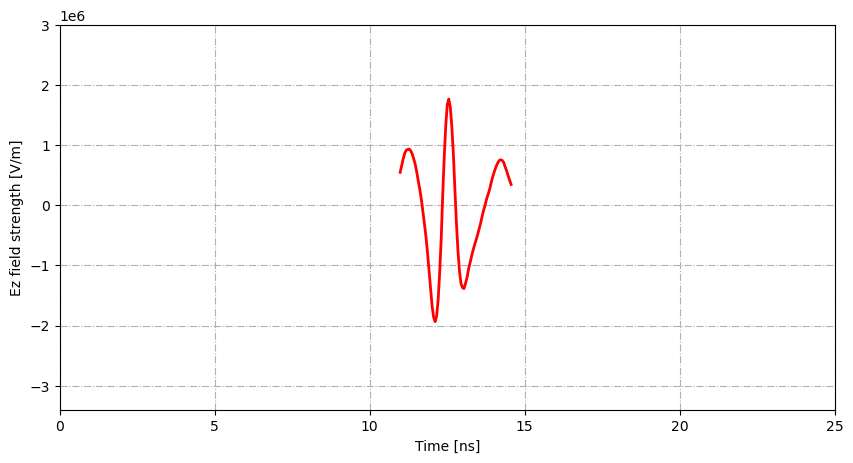

In [22]:
filename = 'data/basecase/High_metal.DZT'
name, mean, rg = read_gssi(filename,[0,1,2,3,5])
time = np.arange(0, rg*(1+1/mean.shape[0]),rg/mean.shape[0])[:-1]

# plot_ascan_thesis(mean,time)

mean_isolated = mean[224:298]
mean_isolated = mean[224:298]

time_isolated = time[224:298]
dt = rg/mean.shape[0] / 1e9

plot_ascan_thesis(mean_isolated,time_isolated)


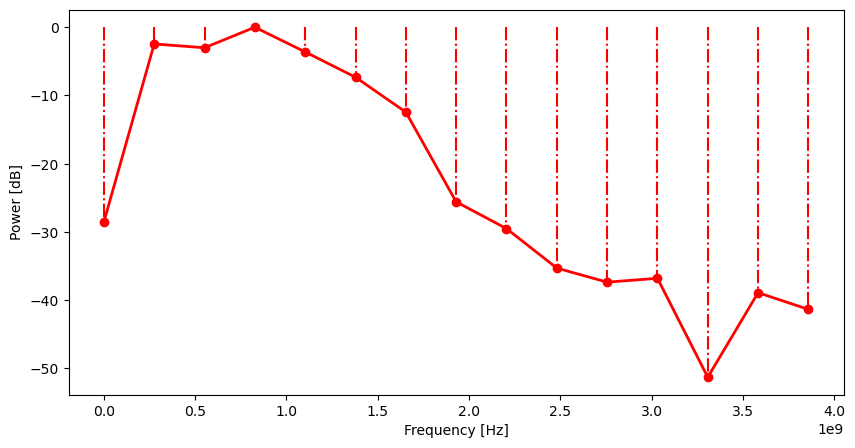

In [28]:
fft_waveform(mean_isolated,dt)

2023-01-12 14:16:50 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-12 14:16:50 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-12 14:16:50 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-12 14:16:50 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2023-01-12 14:16:50 - more info: rh_ant=['41000SA', None, None, None]
2023-01-12 14:16:50 -            known_ant=[False, None, None, None]
2023-01-12 14:16:50 - please submit a bug report with this warning, the antenna name and frequency
2023-01-12 14:16:50 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-12 14:16:50 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-12 14:16:50 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------
2023-01-12 14:16:50 - WARNING: no time zero specified

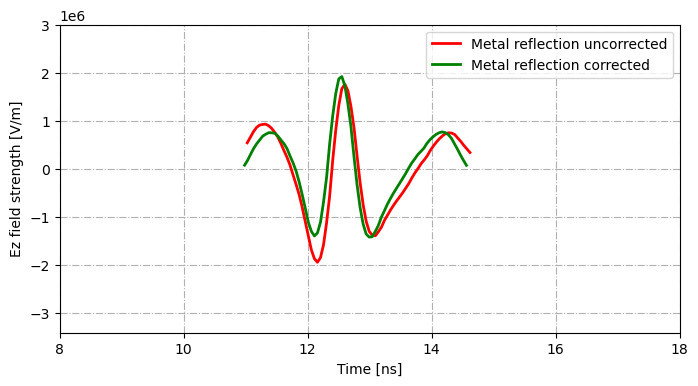

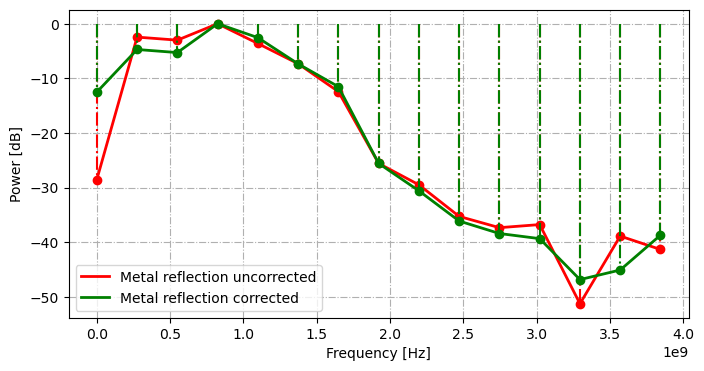

In [48]:
# File 1:
filename = 'data/basecase/High_metal.DZT'
name1, mean1, rg = read_gssi(filename,[0,1,2,3,5])
time1 = np.arange(0, rg*(1+1/mean.shape[0]),rg/mean.shape[0])[:-1]
# Isolation
mean_isolated1 = mean1[224:298]
time_isolated1= time1[224:298]

# File 2:
filename1 = 'data/basecase/Trolley.DZT'
filename2 = 'data/basecase/High_metal.DZT'
mean2, time2, rg = diff_two_ascan_shifted(filename1,filename2)
# Isolation
mean_isolated2 = mean2[224:298]
time_isolated2= time2[224:298]

# Time step
dt = rg/mean.shape[0] / 1e9

# Isolated plot
plot_two_ascan_thesis(mean_isolated1,time_isolated1,mean_isolated2,time_isolated2)

# FFT plot
fft_two_waveform(mean_isolated1,dt,mean_isolated2,dt)


2023-01-12 16:10:32 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-12 16:10:32 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-12 16:10:32 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-12 16:10:32 - WARNING: trying to use frequencies of 41000 MHz (estimated)...
2023-01-12 16:10:32 - more info: rh_ant=['41000SA', None, None, None]
2023-01-12 16:10:32 -            known_ant=[False, None, None, None]
2023-01-12 16:10:32 - please submit a bug report with this warning, the antenna name and frequency
2023-01-12 16:10:32 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-12 16:10:32 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-12 16:10:32 - if possible, please attach a ZIP file with the offending DZT inside.
--------------------------------------------------------------
2023-01-12 16:10:32 - WARNING: no time zero specified

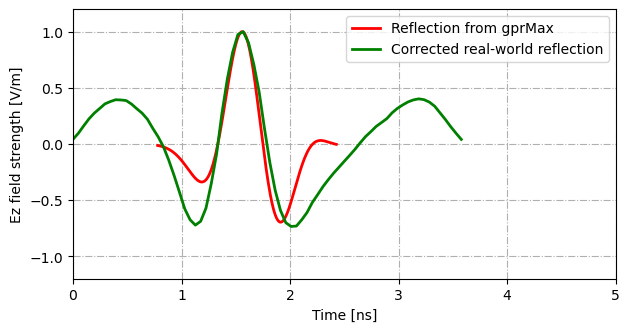

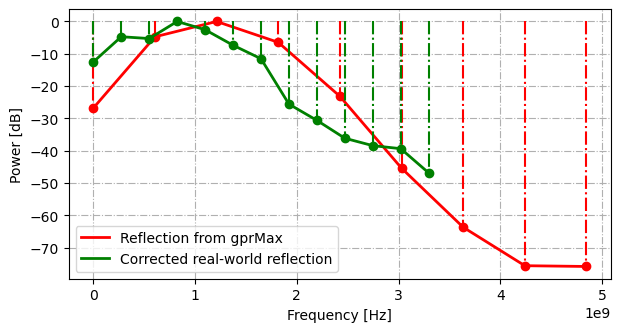

In [73]:
# File 1 from simulation
filename = "files/output_files/2D_HighMetal/2D_HighMetal.out"
data, time, dt1 = read_data(filename)

# Isolation 
data_isolated = data[1250:1600]
time_isolated = time[1250:1600]*1e9
# Normalization
data_norm = data_isolated / np.amax(data_isolated)
# Shifting
time_shifted = time_isolated - np.amin(time_isolated)+0.78 #Adjust shift 

# File 2 from real-world GPR data
filename1 = 'data/basecase/Trolley.DZT'
filename2 = 'data/basecase/High_metal.DZT'
mean2, time2, rg = diff_two_ascan_shifted(filename1,filename2)
dt2 = rg/mean2.shape[0] / 1e9
# Isolation
mean_isolated2 = mean2[224:298]
time_isolated2= time2[224:298]
# Normalization
mean_norm = mean_isolated2 / np.amax(mean_isolated2)
# Shifting
time_shifted2 = time_isolated2 - np.amin(time_isolated2)

# Isolated plot
plot_two_ascan_thesis(data_norm,time_shifted,mean_norm,time_shifted2)

# FFT plot
fft_two_waveform(data_norm,dt1,mean_norm,dt2)